In [1]:
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

sys.path.append('../')
from simulator_myokit import Simulator
sys.path.append('../../')
import plot_cell

0.0 15.4 (7701,)


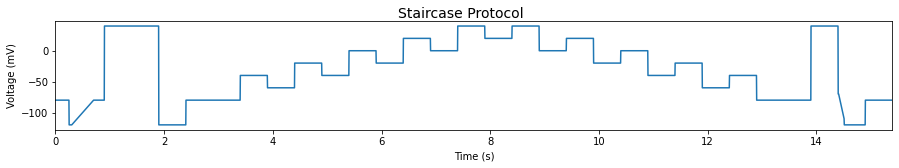

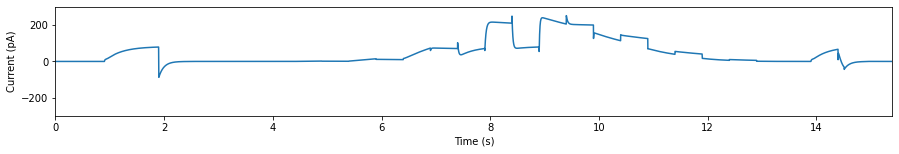

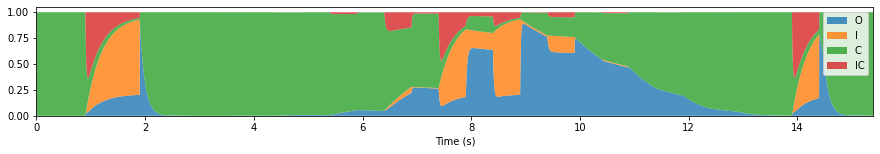

--- 2.1449453830718994 seconds ---


In [2]:
sys.path.append('../Protocols')
from protocols import leak_staircase
'''
Kylie 2017 IKr
'''
model_path = "../mmt-model-files/kylie-2017-IKr.mmt" 
start_time = time.time()
simulator = Simulator(model_path, leak_staircase, pre_sim=2) 
simulator.name = "Kylie 2017 IKr"
dt = 0.002
times = np.arange(0, 15.4+dt, dt)
print(times.min(), times.max(), times.shape)

sim_params = {
    'ikr.g' : 3.05762986e+03,         # 'Endocardial' : 0,    'Epicardial' : 1,    'Mid-myocardial' : 2,
    'ikr.p1' : 1.12956276e-01,
    'ikr.p2' : 8.40568507e+01,
    'ikr.p3' : 3.88104629e-01,
    'ikr.p4' : 2.77827575e+01,
    'ikr.p5' : 1.51148201e+00,
    'ikr.p6' : 8.67120219e+01,
    'ikr.p7' : 8.27551811e+01,
    'ikr.p8' : 4.53615892e+01
} 
simulator.set_simulation_params(sim_params)

# simulator.pacing_constant_pre_simulate(-80e-3)
d = simulator.simulate(times, extra_log=['ikr.IKr', 'ikr.open', 'ikr.active'])    
population_by_continent = {
    'O': d['ikr.open']*d['ikr.active'],
    'I': d['ikr.open']*(1-d['ikr.active']),
    'C': (1-d['ikr.open'])*d['ikr.active'],
    'IC': (1-d['ikr.open'])*(1-d['ikr.active']),    
}
plot_cell.plot_1D( d['engine.time'], d['membrane.V']*1000, title='Staircase Protocol', figsize=(15,2), xlabel='Time (s)', ylabel='Voltage (mV)', label=None, xlim=(0, times.max()), ylim=None, save_path=None)
plot_cell.plot_1D( d['engine.time'], d['ikr.IKr'], title=None, figsize=(15,2), xlabel='Time (s)', ylabel='Current (pA)', label=None, xlim=(0, times.max()), ylim=[-300,300], save_path=None)
plot_cell.plot_stack( d['engine.time'], population_by_continent.values(), labels=population_by_continent.keys(), figsize=(15,2), xlabel='Time (s)', xlim=(0, times.max()), save_path=None )
print("--- %s seconds ---"%(time.time()-start_time))

In [3]:
print(d['membrane.V'].shape, d['membrane.V'].std())

(7700,) 0.048668778822216985


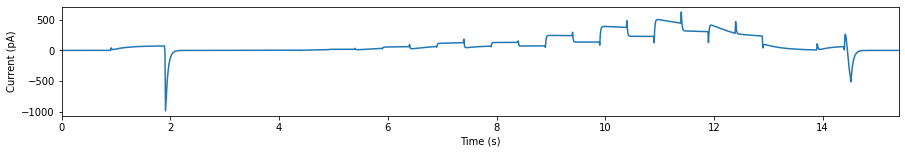

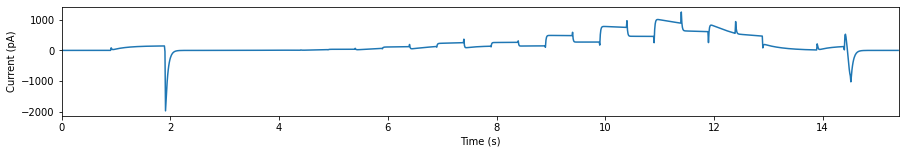

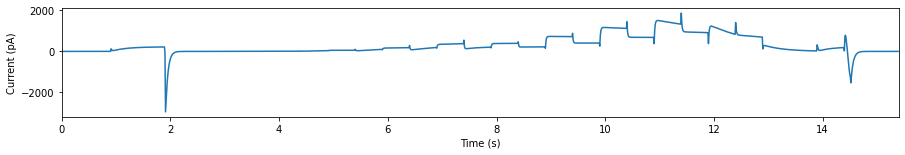

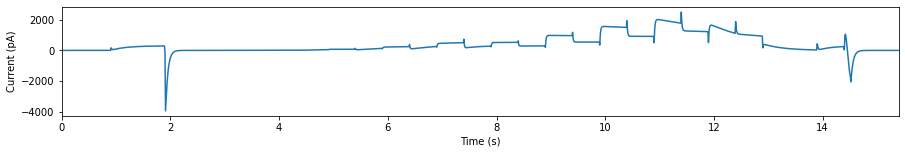

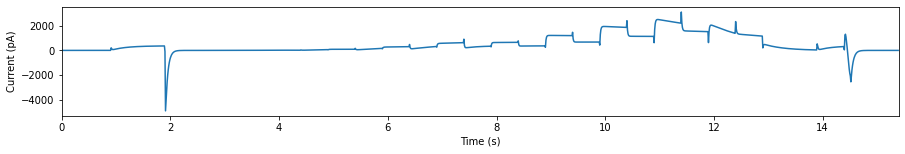

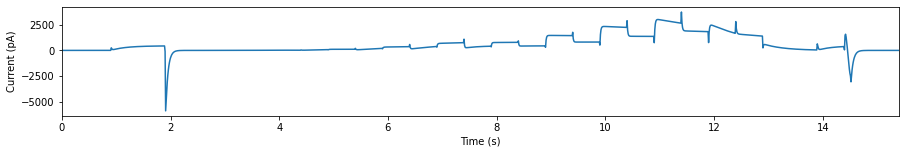

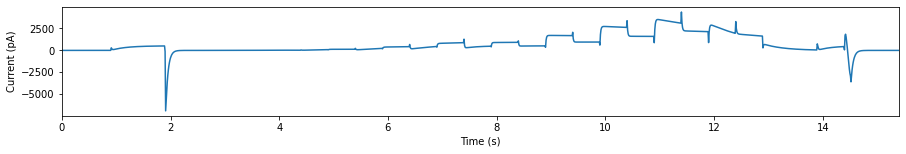

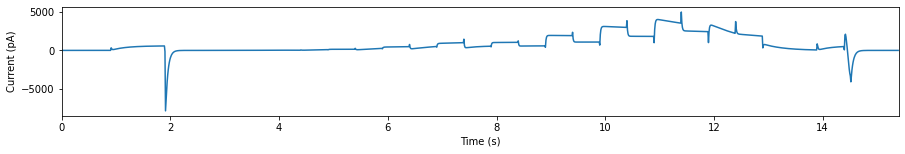

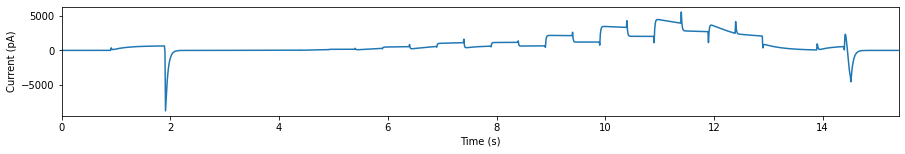

--- 2.7461864948272705 seconds ---


In [4]:
sys.path.append('../Protocols')
from protocols import leak_staircase
'''
Kylie 2017 IKr
'''
model_path = "../mmt-model-files/kylie-2017-IKr.mmt" 
start_time = time.time()
simulator = Simulator(model_path, leak_staircase, pre_sim=2) 
simulator.name = "Kylie 2017 IKr"
dt = 0.01
times = np.arange(0, 15.4+dt, dt)

# simulator.pacing_constant_pre_simulate(-80e-3)

for i in np.arange(0.1, 1, 0.1):
    sim_params = {
        'ikr.g': 500000*i,         # 'Endocardial' : 0,    'Epicardial' : 1,    'Mid-myocardial' : 2,
#         'ikr.p1' : 10*i,
#         'ikr.p2' : 100*i,
#         'ikr.p3' : 1,
#         'ikr.p4' : 1,
#         'ikr.p5' : 1,
#         'ikr.p6' : 1,
#         'ikr.p7' : 1,
#         'ikr.p8' : 1    
    } 
    simulator.set_simulation_params(sim_params)
    d = simulator.simulate(times, extra_log=['ikr.IKr', 'ikr.open', 'ikr.active'])    
    population_by_continent = {
        'O': d['ikr.open']*d['ikr.active'],
        'I': d['ikr.open']*(1-d['ikr.active']),
        'C': (1-d['ikr.open'])*d['ikr.active'],
        'IC': (1-d['ikr.open'])*(1-d['ikr.active']),    
    }
#     plot_cell.plot_1D( d['engine.time'], d['membrane.V']*1000, title='Staircase Protocol', figsize=(15,2), xlabel='Time (s)', ylabel='Voltage (mV)', label=None, xlim=(0, times.max()), ylim=None, save_path=None)
    plot_cell.plot_1D( d['engine.time'], d['ikr.IKr'], title=None, figsize=(15,2), xlabel='Time (s)', ylabel='Current (pA)', label=None, xlim=(0, times.max()), save_path=None)
#     plot_cell.plot_stack( d['engine.time'], population_by_continent.values(), labels=population_by_continent.keys(), figsize=(15,2), xlabel='Time (s)', xlim=(0, times.max()), save_path=None )
    
print("--- %s seconds ---"%(time.time()-start_time))